In [1]:
import pandas as pd
import seaborn as sns

In [40]:
from sklearn.preprocessing import StandardScaler

In [309]:
df = pd.read_csv('./dataset.csv')
threshold = 244
train = int(threshold)

In [310]:
df

,Период_год,Период_неделя,Период_Начало нед,"KPI данные понедельно АлфаРМ_Продажи, рубли","KPI данные понедельно АлфаРМ_Продажи, упаковки","KPIданные помесячно АлфаРМ_Продажи, рубли","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 150 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 50 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 500 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 150 мл N1, упаковки",...,"Медиа (Конкурент 12)_ТВ Рег, рубли",Медиа (Конкурент 12)_Итого,"Медиа (Конкурент 13)_ТВ, trp(Ж 30-60 ВС)","Медиа (Конкурент 13)_ТВ, охват 5+(Ж 30-60 ВС)","Медиа (Конкурент 13)_ТВ, рубли","Медиа (Конкурент 13)_Диджитал, руб","Медиа (Конкурент 13)_ТВ спонсорство, рубли","Медиа (Конкурент 13)_OOH, рубли","Медиа (Конкурент 13)_Радио, рубли",Медиа (Конкурент 13)_Итого
0,2019,1,2018-12-31 00:00:00,4.153557e+07,114621.15,533280434.8,3.571190e+08,1.311226e+08,1.964447e+07,886424.7,...,7.155664e+06,11834254.13,207.903106,15.3615,9085528.010322582,0.0,0.0,0.0,0.0,9085528.01
1,2019,2,2019-01-07 00:00:00,5.122229e+07,141523.20,533280434.8,3.571190e+08,1.311226e+08,1.964447e+07,886424.7,...,8.348274e+06,13996532.16,317.467542,25.5255,10599782.67870968,0.0,0.0,0.0,0.0,10599782.68
2,2019,3,2019-01-14 00:00:00,5.712735e+07,157926.30,533280434.8,3.571190e+08,1.311226e+08,1.964447e+07,886424.7,...,8.348274e+06,11466294.66,192.816682,13.9125,10599782.67870968,0.0,0.0,0.0,0.0,10599782.68
3,2019,4,2019-01-21 00:00:00,6.304099e+07,173746.65,533280434.8,3.571190e+08,1.311226e+08,1.964447e+07,886424.7,...,8.348274e+06,10764632.16,138.371621,8.0535,10599782.67870968,0.0,0.0,0.0,0.0,10599782.68
4,2019,5,2019-01-28 00:00:00,6.733689e+07,185551.80,533280434.8,3.571190e+08,1.311226e+08,1.964447e+07,886424.7,...,8.477038e+06,10984967.91,286.984113,24.2235,12893092.405548388,0.0,0.0,0.0,0.0,12893092.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,2024,49,2024-12-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,2024,50,2024-12-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
311,2024,51,2024-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
312,2024,52,2024-12-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data normalization and sampling

In [311]:
WINDOW_SIZE = 5

In [312]:
# threshold = 244
# train = int(threshold)

import numpy as np
df = pd.read_csv('./dataset.csv')
df.replace(' ', pd.NA, inplace=True)
df.replace(0.0, pd.NA, inplace=True)
df.replace(0, pd.NA, inplace=True)

df = df.apply(lambda x: pd.to_numeric(x, errors='ignore'))

numeric_columns = df.select_dtypes(include=['number'])

column_means = numeric_columns.mean()

df[numeric_columns.columns] = df[numeric_columns.columns].fillna(column_means)

col = [column for column in df.select_dtypes(include=['number']) if ('руб' in column.lower()) or ('итого' in column.lower())]
df[col] = df[col] / 10**8

col = [column for column in df.columns if 'конкурент' not in column.lower()]
new_df = df[col]
X, y = new_df.drop(columns=['KPI данные понедельно АлфаРМ_Продажи, рубли']), new_df['KPI данные понедельно АлфаРМ_Продажи, рубли']
X = X[X.columns[3:]]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

train_X, train_y  = df_scaled[:train], y[:train]
test_X, test_y = df_scaled[train:threshold+1], y[train:threshold+1]
train_X['target'] = train_y
test_X['target'] = test_y

/tmp/ipykernel_587696/1172892595.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X['target'] = train_y
/tmp/ipykernel_587696/1172892595.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X['target'] = test_y


In [313]:
train_X

,"KPI данные понедельно АлфаРМ_Продажи, упаковки","KPIданные помесячно АлфаРМ_Продажи, рубли","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 150 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 50 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 500 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 150 мл N1, упаковки","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 50 мл N1, упаковки","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 500 мл N1, упаковки",Дистрибуция (данные Альфа РМ)_Дистрибуция Мирамистин,выписки врачами_Выписки,...,"Медиа ТВ (Моделируемый бренд)_(4)ТВ, рубли","Медиа ТВ (Моделируемый бренд)_(4)ТВ, охват 5+(Ж 30-60 ВС)","Медиа ТВ (Моделируемый бренд)_(тотал)ТВ, trp(Ж 30-60 ВС)","Медиа ТВ (Моделируемый бренд)_(тотал)ТВ, рубли","Медиа ТВ (Моделируемый бренд)_(тотал)ТВ, охват 5+(Ж 30-60 ВС)","Медиа Диджитал (Моделируемый бренд)_Диджитал, рубли","Медиа Радио (Моделируемый бренд)_Радио, рубли","Медиа Радио (Моделируемый бренд)_Радио, количество выходов",Запросы Wordstat_Запросы Wordstat,target
0,-0.965638,-1.355514e-01,-1.450327e-01,0.158714,-1.133871e+00,0.40991,0.543713,-5.145841e-01,-1.018405,1.753231,...,1.743484e-15,0.0,0.000000,-7.288945e-17,0.000000,-1.951488e-01,-1.940454e-15,1.682721e-15,-8.360331e-02,0.415356
1,-0.391928,-1.355514e-01,-1.450327e-01,0.158714,-1.133871e+00,0.40991,0.543713,-5.145841e-01,-1.018405,1.753231,...,1.743484e-15,0.0,-4.606733,3.958490e-02,0.000000,-3.201449e-01,-1.940454e-15,1.682721e-15,6.341898e-01,0.512223
2,-0.042117,-1.355514e-01,-1.450327e-01,0.158714,-1.133871e+00,0.40991,0.543713,-5.145841e-01,-1.018405,1.753231,...,1.743484e-15,0.0,1.063556,1.398727e-01,1.451539,-9.072979e-02,-1.940454e-15,1.682721e-15,1.041318e+00,0.571273
3,0.295266,-1.355514e-01,-1.450327e-01,0.158714,-1.133871e+00,0.40991,0.543713,-5.145841e-01,-1.018405,1.753231,...,1.743484e-15,0.0,-0.271569,1.398727e-01,-0.062525,-4.996872e-01,-1.940454e-15,1.682721e-15,1.224163e+00,0.630410
4,0.547021,-1.355514e-01,-1.450327e-01,0.158714,-1.133871e+00,0.40991,0.543713,-5.145841e-01,-1.018405,1.753231,...,1.743484e-15,0.0,-0.147223,1.398727e-01,0.194208,-1.017232e-16,-1.940454e-15,1.682721e-15,1.764583e+00,0.673369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.000000,7.528150e-16,5.274964e-16,0.000000,-6.882364e-16,0.00000,0.000000,-4.347100e-16,0.000000,0.000000,...,1.743484e-15,0.0,0.000000,-5.621417e-01,0.000000,3.107625e+00,-1.940454e-15,1.682721e-15,-8.520660e-16,0.679789
256,0.000000,7.528150e-16,5.274964e-16,0.000000,-6.882364e-16,0.00000,0.000000,-4.347100e-16,0.000000,0.000000,...,1.743484e-15,0.0,0.000000,-5.621417e-01,0.000000,2.729945e+00,-2.861127e+00,-3.043731e+00,-8.520660e-16,0.679789
257,0.000000,7.528150e-16,5.274964e-16,0.000000,-6.882364e-16,0.00000,0.000000,-4.347100e-16,0.000000,0.000000,...,1.743484e-15,0.0,0.000000,-5.621417e-01,0.000000,3.393194e+00,9.659928e-02,-4.327693e-01,-8.520660e-16,0.679789
258,0.000000,7.528150e-16,5.274964e-16,0.000000,-6.882364e-16,0.00000,0.000000,-4.347100e-16,0.000000,0.000000,...,1.743484e-15,0.0,0.000000,-5.621417e-01,0.000000,3.015254e+00,-2.486587e+00,-2.763985e+00,-8.520660e-16,0.679789


In [314]:
import pickle
pickle.dump(ss, open('./api/scaler.pkl', 'wb'))

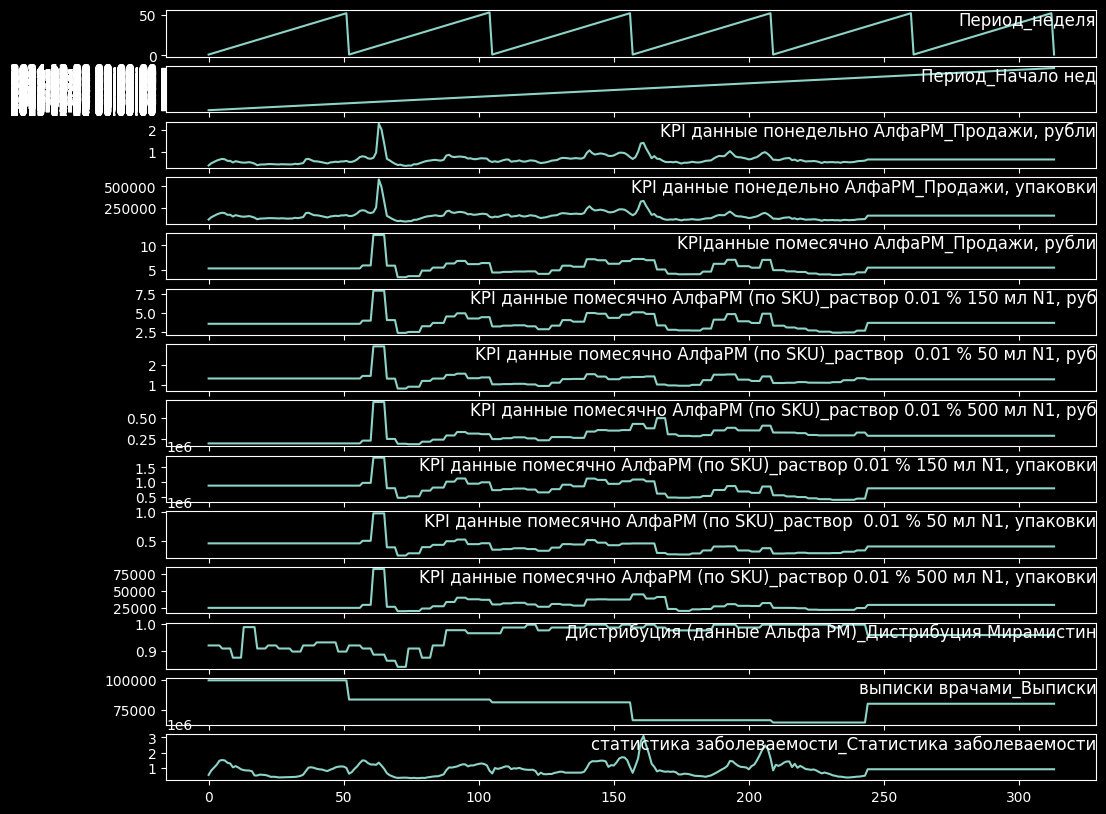

In [315]:
import matplotlib.pyplot as plt
dataset = df
values = dataset.values

groups = range(1, 15)
i = 1

plt.figure(figsize=(12, 10))

for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

### Deep Learning Model

In [316]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

In [317]:
from typing import List
import numpy as np

class TSDataset(Dataset):
    def __init__(self, params_list: List[str], df: pd.DataFrame, scaler, window_size: int = 5):
        self._window_size = window_size
        self._params_list = [k[0] for k in params_list]
        self._data = df
        self._scaler = scaler

    def __len__(self):
        return len(self._data) - self._window_size

    def __getitem__(self, idx: int):
        dataframe = self._data[idx: idx + self._window_size]
        # dataframe = dataframe[self._params_list]
        tns = torch.FloatTensor(dataframe.values)
        y = torch.from_numpy(np.array([self._data['target'].iloc[idx + self._window_size]])).type(torch.float)
        
        return tns, y

In [318]:
from torch.utils.data import DataLoader

train_set = TSDataset(train_X.columns, train_X, ss, WINDOW_SIZE)


train_dataloader = DataLoader(train_set, batch_size=32, shuffle=True)

In [319]:
class SalesLSTM(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=len(train_set._params_list), hidden_size=50, num_layers=4, batch_first=True)

        self.linear1 = nn.Linear(50, 100)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(100, 1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x, _ = self.lstm(x)
        x = x[:, -1, :]
        x = self.relu(self.linear1(x))
        return self.linear2(x)

In [320]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [321]:
from torch import optim
from tqdm.auto import tqdm

model = SalesLSTM().to(device)
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
n_epochs = 500
for epoch in (pbar := tqdm(range(n_epochs))):
    model.train()
    for X_batch, y_batch in train_dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        y_pred = model(X_batch)

        loss = loss_fn(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        pbar.set_description(f"Loss: {loss.item()}")

  0%|          | 0/500 [00:00<?, ?it/s]

In [322]:
test_set = TSDataset(test_X.columns, test_X, ss, WINDOW_SIZE)
from torch.utils.data import DataLoader

train_dataloader = DataLoader(test_set, batch_size=32, shuffle=False)

In [334]:
import numpy as np
threshold = len(df)
df = pd.read_csv('./dataset.csv')
df.replace(' ', pd.NA, inplace=True)
df.replace(0.0, pd.NA, inplace=True)
df.replace(0, pd.NA, inplace=True)

df = df.apply(lambda x: pd.to_numeric(x, errors='ignore'))

numeric_columns = df.select_dtypes(include=['number'])

column_means = numeric_columns.mean()

df[numeric_columns.columns] = df[numeric_columns.columns].fillna(column_means)

col = [column for column in df.select_dtypes(include=['number']) if ('руб' in column.lower()) or ('итого' in column.lower())]
df[col] = df[col] / 10**8

col = [column for column in df.columns if 'конкурент' not in column.lower()]
new_df = df[col]
X, y = new_df.drop(columns=['KPI данные понедельно АлфаРМ_Продажи, рубли']), new_df['KPI данные понедельно АлфаРМ_Продажи, рубли']
X = X[X.columns[3:]]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

train_X, train_y  = df_scaled[:train], y[:train]
test_X, test_y = df_scaled[train:threshold+1], y[train:threshold+1]
train_X['target'] = train_y
test_X['target'] = test_y

/tmp/ipykernel_587696/1095748924.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X['target'] = train_y
/tmp/ipykernel_587696/1095748924.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X['target'] = test_y


In [335]:
def eval():
    df = pd.concat([train_X, test_X], ignore_index=True)
    train_set = TSDataset(df.columns, df, ss, WINDOW_SIZE)
    train_dataloader = DataLoader(train_set, batch_size=1, shuffle=False)

    predictions = []
    model.eval()
    with torch.no_grad():
        for inputs, _ in train_dataloader:
            inputs = inputs.to(device)
            outputs = model(inputs)

            predictions.append(outputs.cpu().item())
    predictions = np.array(predictions)
    return predictions

In [336]:
pred = eval()

In [337]:
df = pd.read_csv('./dataset.csv')

In [338]:
df

,Период_год,Период_неделя,Период_Начало нед,"KPI данные понедельно АлфаРМ_Продажи, рубли","KPI данные понедельно АлфаРМ_Продажи, упаковки","KPIданные помесячно АлфаРМ_Продажи, рубли","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 150 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 50 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 500 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 150 мл N1, упаковки",...,"Медиа (Конкурент 12)_ТВ Рег, рубли",Медиа (Конкурент 12)_Итого,"Медиа (Конкурент 13)_ТВ, trp(Ж 30-60 ВС)","Медиа (Конкурент 13)_ТВ, охват 5+(Ж 30-60 ВС)","Медиа (Конкурент 13)_ТВ, рубли","Медиа (Конкурент 13)_Диджитал, руб","Медиа (Конкурент 13)_ТВ спонсорство, рубли","Медиа (Конкурент 13)_OOH, рубли","Медиа (Конкурент 13)_Радио, рубли",Медиа (Конкурент 13)_Итого
0,2019,1,2018-12-31 00:00:00,4.153557e+07,114621.15,533280434.8,3.571190e+08,1.311226e+08,1.964447e+07,886424.7,...,7.155664e+06,11834254.13,207.903106,15.3615,9085528.010322582,0.0,0.0,0.0,0.0,9085528.01
1,2019,2,2019-01-07 00:00:00,5.122229e+07,141523.20,533280434.8,3.571190e+08,1.311226e+08,1.964447e+07,886424.7,...,8.348274e+06,13996532.16,317.467542,25.5255,10599782.67870968,0.0,0.0,0.0,0.0,10599782.68
2,2019,3,2019-01-14 00:00:00,5.712735e+07,157926.30,533280434.8,3.571190e+08,1.311226e+08,1.964447e+07,886424.7,...,8.348274e+06,11466294.66,192.816682,13.9125,10599782.67870968,0.0,0.0,0.0,0.0,10599782.68
3,2019,4,2019-01-21 00:00:00,6.304099e+07,173746.65,533280434.8,3.571190e+08,1.311226e+08,1.964447e+07,886424.7,...,8.348274e+06,10764632.16,138.371621,8.0535,10599782.67870968,0.0,0.0,0.0,0.0,10599782.68
4,2019,5,2019-01-28 00:00:00,6.733689e+07,185551.80,533280434.8,3.571190e+08,1.311226e+08,1.964447e+07,886424.7,...,8.477038e+06,10984967.91,286.984113,24.2235,12893092.405548388,0.0,0.0,0.0,0.0,12893092.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,2024,49,2024-12-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,2024,50,2024-12-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
311,2024,51,2024-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
312,2024,52,2024-12-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


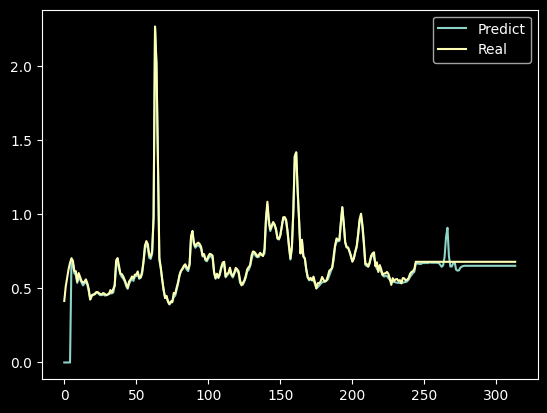

In [339]:
plt.plot([0] * 5 + list(pred[:]))
plt.plot(pd.concat([train_X, test_X], ignore_index=True)['target'].values)
plt.legend(['Predict', 'Real'])

In [340]:
df['target'] = [0] * 5 + list(pred[:])

In [341]:
submit = df.iloc[244:273]

In [342]:
samp = pd.read_csv('./sample_submission.csv')

In [343]:
samp['revenue'] = submit['target'].values

In [344]:
samp['revenue'] = samp['revenue'] * 10**8

In [346]:
samp.to_csv('./submission.csv', index=False)

In [347]:
submit[['Период_Начало нед', 'target']]

,Период_Начало нед,target
244,2023-09-04 00:00:00,0.668059
245,2023-09-11 00:00:00,0.668448
246,2023-09-18 00:00:00,0.666562
247,2023-09-25 00:00:00,0.665297
248,2023-10-02 00:00:00,0.667069
249,2023-10-09 00:00:00,0.673072
250,2023-10-16 00:00:00,0.670540
251,2023-10-23 00:00:00,0.674444
252,2023-10-30 00:00:00,0.670478
253,2023-11-06 00:00:00,0.674605


In [139]:
dataf = pd.DataFrame({'pred': pred})

In [140]:
dataf = pd.read_csv('./api/pred.csv')
dataf['week'] = df['Период_Начало нед']
dataf.to_csv('./api/pred.csv', index=False)

In [141]:
torch.save(model.state_dict(), 'model.m5')

In [142]:
model

SalesLSTM(
  (lstm): LSTM(34, 50, num_layers=6, batch_first=True)
  (linear1): Linear(in_features=50, out_features=100, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=100, out_features=1, bias=True)
)

In [143]:
import matplotlib.pyplot as plt

In [144]:
df = pd.concat([train_X])

In [145]:
y = df['target'].copy(deep=True)

In [31]:
y

Период_Начало нед
2018-12-31 00:00:00    0.415356
2019-01-07 00:00:00    0.512223
2019-01-14 00:00:00    0.571273
2019-01-21 00:00:00    0.630410
2019-01-28 00:00:00    0.673369
                         ...   
2024-12-02 00:00:00    0.679789
2024-12-09 00:00:00    0.679789
2024-12-16 00:00:00    0.679789
2024-12-23 00:00:00    0.679789
2024-12-30 00:00:00    0.679789
Name: target, Length: 314, dtype: float64

In [88]:
test_X

,"KPI данные понедельно АлфаРМ_Продажи, упаковки","KPIданные помесячно АлфаРМ_Продажи, рубли","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 150 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 50 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 500 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 150 мл N1, упаковки","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 50 мл N1, упаковки","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 500 мл N1, упаковки",Дистрибуция (данные Альфа РМ)_Дистрибуция Мирамистин,выписки врачами_Выписки,...,"Медиа ТВ (Моделируемый бренд)_(4)ТВ, рубли","Медиа ТВ (Моделируемый бренд)_(4)ТВ, охват 5+(Ж 30-60 ВС)","Медиа ТВ (Моделируемый бренд)_(тотал)ТВ, trp(Ж 30-60 ВС)","Медиа ТВ (Моделируемый бренд)_(тотал)ТВ, рубли","Медиа ТВ (Моделируемый бренд)_(тотал)ТВ, охват 5+(Ж 30-60 ВС)","Медиа Диджитал (Моделируемый бренд)_Диджитал, рубли","Медиа Радио (Моделируемый бренд)_Радио, рубли","Медиа Радио (Моделируемый бренд)_Радио, количество выходов",Запросы Wordstat_Запросы Wordstat,target
188,-0.025905,6.549321e-01,5.020249e-01,0.895211,8.012549e-01,-0.255447,-0.008917,-2.508529e-01,1.022039,-1.23399,...,1.743484e-15,0.0,0.0,-0.562142,0.0,-7.027805e-01,-1.940454e-15,1.682721e-15,-5.914995e-01,0.791827
189,0.156927,6.549321e-01,5.020249e-01,0.895211,8.012549e-01,-0.255447,-0.008917,-2.508529e-01,1.022039,-1.23399,...,1.743484e-15,0.0,0.0,-0.562142,0.0,-5.908991e-01,-1.940454e-15,1.682721e-15,-1.790221e-01,0.837834
190,0.103051,6.549321e-01,5.020249e-01,0.895211,8.012549e-01,-0.255447,-0.008917,-2.508529e-01,1.022039,-1.23399,...,1.743484e-15,0.0,0.0,-0.562142,0.0,-7.031130e-01,-1.940454e-15,1.682721e-15,1.143047e-01,0.826625
191,0.116083,6.549321e-01,5.020249e-01,0.895211,8.012549e-01,-0.255447,-0.008917,-2.508529e-01,1.022039,-1.23399,...,1.743484e-15,0.0,0.0,-0.562142,0.0,2.089599e-01,-1.940454e-15,1.682721e-15,3.413548e-01,0.830105
192,0.595993,1.343879e+00,1.368389e+00,0.947874,1.189886e+00,0.343637,0.019091,1.280569e-01,1.022039,-1.23399,...,1.743484e-15,0.0,0.0,-0.562142,0.0,3.917762e-01,-1.940454e-15,1.682721e-15,1.412949e-01,0.946097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,0.000000,7.528150e-16,5.274964e-16,0.000000,-6.882364e-16,0.000000,0.000000,-4.347100e-16,0.000000,0.00000,...,1.743484e-15,0.0,0.0,-0.562142,0.0,-1.017232e-16,-1.940454e-15,1.682721e-15,-8.520660e-16,0.679789
310,0.000000,7.528150e-16,5.274964e-16,0.000000,-6.882364e-16,0.000000,0.000000,-4.347100e-16,0.000000,0.00000,...,1.743484e-15,0.0,0.0,-0.562142,0.0,-1.017232e-16,-1.940454e-15,1.682721e-15,-8.520660e-16,0.679789
311,0.000000,7.528150e-16,5.274964e-16,0.000000,-6.882364e-16,0.000000,0.000000,-4.347100e-16,0.000000,0.00000,...,1.743484e-15,0.0,0.0,-0.562142,0.0,-1.017232e-16,-1.940454e-15,1.682721e-15,-8.520660e-16,0.679789
312,0.000000,7.528150e-16,5.274964e-16,0.000000,-6.882364e-16,0.000000,0.000000,-4.347100e-16,0.000000,0.00000,...,1.743484e-15,0.0,0.0,-0.562142,0.0,-1.017232e-16,-1.940454e-15,1.682721e-15,-8.520660e-16,0.679789


In [ ]:
244

In [95]:
df.iloc[244:273]

,Период_год,Период_неделя,Период_Начало нед,"KPI данные понедельно АлфаРМ_Продажи, рубли","KPI данные понедельно АлфаРМ_Продажи, упаковки","KPIданные помесячно АлфаРМ_Продажи, рубли","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 150 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 50 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 500 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 150 мл N1, упаковки",...,"Медиа (Конкурент 12)_ТВ Рег, рубли",Медиа (Конкурент 12)_Итого,"Медиа (Конкурент 13)_ТВ, trp(Ж 30-60 ВС)","Медиа (Конкурент 13)_ТВ, охват 5+(Ж 30-60 ВС)","Медиа (Конкурент 13)_ТВ, рубли","Медиа (Конкурент 13)_Диджитал, руб","Медиа (Конкурент 13)_ТВ спонсорство, рубли","Медиа (Конкурент 13)_OOH, рубли","Медиа (Конкурент 13)_Радио, рубли",Медиа (Конкурент 13)_Итого
244,2023,36,2023-09-04 00:00:00,0.679789,159901.242418,5.492729,3.693291,1.270846,0.287899,796164.427869,...,0.083118,0.103875,218.83756,16.303599,0.029127,0.009731,NaN,0.000246,0.000171,0.064318
245,2023,37,2023-09-11 00:00:00,0.679789,159901.242418,5.492729,3.693291,1.270846,0.287899,796164.427869,...,0.083118,0.103875,218.83756,16.303599,0.029127,0.009731,NaN,0.000246,0.000171,0.064318
246,2023,38,2023-09-18 00:00:00,0.679789,159901.242418,5.492729,3.693291,1.270846,0.287899,796164.427869,...,0.083118,0.103875,218.83756,16.303599,0.029127,0.009731,NaN,0.000246,0.000171,0.064318
247,2023,39,2023-09-25 00:00:00,0.679789,159901.242418,5.492729,3.693291,1.270846,0.287899,796164.427869,...,0.083118,0.103875,218.83756,16.303599,0.029127,0.009731,NaN,0.000246,0.000171,0.064318
248,2023,40,2023-10-02 00:00:00,0.679789,159901.242418,5.492729,3.693291,1.270846,0.287899,796164.427869,...,0.083118,0.103875,218.83756,16.303599,0.029127,0.009731,NaN,0.000246,0.000171,0.064318
249,2023,41,2023-10-09 00:00:00,0.679789,159901.242418,5.492729,3.693291,1.270846,0.287899,796164.427869,...,0.083118,0.103875,218.83756,16.303599,0.029127,0.009731,NaN,0.000246,0.000171,0.064318
250,2023,42,2023-10-16 00:00:00,0.679789,159901.242418,5.492729,3.693291,1.270846,0.287899,796164.427869,...,0.083118,0.103875,218.83756,16.303599,0.029127,0.009731,NaN,0.000246,0.000171,0.064318
251,2023,43,2023-10-23 00:00:00,0.679789,159901.242418,5.492729,3.693291,1.270846,0.287899,796164.427869,...,0.083118,0.103875,218.83756,16.303599,0.029127,0.009731,NaN,0.000246,0.000171,0.064318
252,2023,44,2023-10-30 00:00:00,0.679789,159901.242418,5.492729,3.693291,1.270846,0.287899,796164.427869,...,0.083118,0.103875,218.83756,16.303599,0.029127,0.009731,NaN,0.000246,0.000171,0.064318
253,2023,45,2023-11-06 00:00:00,0.679789,159901.242418,5.492729,3.693291,1.270846,0.287899,796164.427869,...,0.083118,0.103875,218.83756,16.303599,0.029127,0.009731,NaN,0.000246,0.000171,0.064318


In [41]:
with torch.no_grad():
    model.eval()
    for idx in range(WINDOW_SIZE, len(df) - WINDOW_SIZE):
        window = df.iloc[idx - WINDOW_SIZE: idx]
        features = window.values.astype(np.float32)
        features_tensor = torch.tensor(features).unsqueeze(0).to(device)
        if(features_tensor.shape[1] != WINDOW_SIZE):
            break
        prediction = model(features_tensor).item()
        df.at[idx, 'target'] = prediction

In [101]:
h = test_X

In [102]:
h

,"KPI данные понедельно АлфаРМ_Продажи, упаковки","KPIданные помесячно АлфаРМ_Продажи, рубли","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 150 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 50 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 500 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 150 мл N1, упаковки","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 50 мл N1, упаковки","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 500 мл N1, упаковки",Дистрибуция (данные Альфа РМ)_Дистрибуция Мирамистин,выписки врачами_Выписки,...,"Медиа ТВ (Моделируемый бренд)_(4)ТВ, рубли","Медиа ТВ (Моделируемый бренд)_(4)ТВ, охват 5+(Ж 30-60 ВС)","Медиа ТВ (Моделируемый бренд)_(тотал)ТВ, trp(Ж 30-60 ВС)","Медиа ТВ (Моделируемый бренд)_(тотал)ТВ, рубли","Медиа ТВ (Моделируемый бренд)_(тотал)ТВ, охват 5+(Ж 30-60 ВС)","Медиа Диджитал (Моделируемый бренд)_Диджитал, рубли","Медиа Радио (Моделируемый бренд)_Радио, рубли","Медиа Радио (Моделируемый бренд)_Радио, количество выходов",Запросы Wordstat_Запросы Wordstat,target
188,-0.025905,6.549321e-01,5.020249e-01,0.895211,8.012549e-01,-0.255447,-0.008917,-2.508529e-01,1.022039,-1.23399,...,1.743484e-15,0.0,0.0,-0.562142,0.0,-7.027805e-01,-1.940454e-15,1.682721e-15,-5.914995e-01,0.791827
189,0.156927,6.549321e-01,5.020249e-01,0.895211,8.012549e-01,-0.255447,-0.008917,-2.508529e-01,1.022039,-1.23399,...,1.743484e-15,0.0,0.0,-0.562142,0.0,-5.908991e-01,-1.940454e-15,1.682721e-15,-1.790221e-01,0.837834
190,0.103051,6.549321e-01,5.020249e-01,0.895211,8.012549e-01,-0.255447,-0.008917,-2.508529e-01,1.022039,-1.23399,...,1.743484e-15,0.0,0.0,-0.562142,0.0,-7.031130e-01,-1.940454e-15,1.682721e-15,1.143047e-01,0.826625
191,0.116083,6.549321e-01,5.020249e-01,0.895211,8.012549e-01,-0.255447,-0.008917,-2.508529e-01,1.022039,-1.23399,...,1.743484e-15,0.0,0.0,-0.562142,0.0,2.089599e-01,-1.940454e-15,1.682721e-15,3.413548e-01,0.830105
192,0.595993,1.343879e+00,1.368389e+00,0.947874,1.189886e+00,0.343637,0.019091,1.280569e-01,1.022039,-1.23399,...,1.743484e-15,0.0,0.0,-0.562142,0.0,3.917762e-01,-1.940454e-15,1.682721e-15,1.412949e-01,0.946097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,0.000000,7.528150e-16,5.274964e-16,0.000000,-6.882364e-16,0.000000,0.000000,-4.347100e-16,0.000000,0.00000,...,1.743484e-15,0.0,0.0,-0.562142,0.0,-1.017232e-16,-1.940454e-15,1.682721e-15,-8.520660e-16,0.679789
310,0.000000,7.528150e-16,5.274964e-16,0.000000,-6.882364e-16,0.000000,0.000000,-4.347100e-16,0.000000,0.00000,...,1.743484e-15,0.0,0.0,-0.562142,0.0,-1.017232e-16,-1.940454e-15,1.682721e-15,-8.520660e-16,0.679789
311,0.000000,7.528150e-16,5.274964e-16,0.000000,-6.882364e-16,0.000000,0.000000,-4.347100e-16,0.000000,0.00000,...,1.743484e-15,0.0,0.0,-0.562142,0.0,-1.017232e-16,-1.940454e-15,1.682721e-15,-8.520660e-16,0.679789
312,0.000000,7.528150e-16,5.274964e-16,0.000000,-6.882364e-16,0.000000,0.000000,-4.347100e-16,0.000000,0.00000,...,1.743484e-15,0.0,0.0,-0.562142,0.0,-1.017232e-16,-1.940454e-15,1.682721e-15,-8.520660e-16,0.679789


In [103]:
h.replace(0.0, pd.NA, inplace=True)

/tmp/ipykernel_587696/1408131686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h.replace(0.0, pd.NA, inplace=True)


In [104]:
column_means = h.mean()

h = h.fillna(column_means)

In [109]:
h

,"KPI данные понедельно АлфаРМ_Продажи, упаковки","KPIданные помесячно АлфаРМ_Продажи, рубли","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 150 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 50 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 500 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 150 мл N1, упаковки","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 50 мл N1, упаковки","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 500 мл N1, упаковки",Дистрибуция (данные Альфа РМ)_Дистрибуция Мирамистин,выписки врачами_Выписки,...,"Медиа ТВ (Моделируемый бренд)_(4)ТВ, рубли","Медиа ТВ (Моделируемый бренд)_(4)ТВ, охват 5+(Ж 30-60 ВС)","Медиа ТВ (Моделируемый бренд)_(тотал)ТВ, trp(Ж 30-60 ВС)","Медиа ТВ (Моделируемый бренд)_(тотал)ТВ, рубли","Медиа ТВ (Моделируемый бренд)_(тотал)ТВ, охват 5+(Ж 30-60 ВС)","Медиа Диджитал (Моделируемый бренд)_Диджитал, рубли","Медиа Радио (Моделируемый бренд)_Радио, рубли","Медиа Радио (Моделируемый бренд)_Радио, количество выходов",Запросы Wordstat_Запросы Wordstat,target
188,-0.025905,6.549321e-01,5.020249e-01,0.895211,8.012549e-01,-0.255447,-0.008917,-2.508529e-01,1.022039,-1.233990,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,-7.027805e-01,-1.940454e-15,1.682721e-15,-5.914995e-01,0.791827
189,0.156927,6.549321e-01,5.020249e-01,0.895211,8.012549e-01,-0.255447,-0.008917,-2.508529e-01,1.022039,-1.233990,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,-5.908991e-01,-1.940454e-15,1.682721e-15,-1.790221e-01,0.837834
190,0.103051,6.549321e-01,5.020249e-01,0.895211,8.012549e-01,-0.255447,-0.008917,-2.508529e-01,1.022039,-1.233990,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,-7.031130e-01,-1.940454e-15,1.682721e-15,1.143047e-01,0.826625
191,0.116083,6.549321e-01,5.020249e-01,0.895211,8.012549e-01,-0.255447,-0.008917,-2.508529e-01,1.022039,-1.233990,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,2.089599e-01,-1.940454e-15,1.682721e-15,3.413548e-01,0.830105
192,0.595993,1.343879e+00,1.368389e+00,0.947874,1.189886e+00,0.343637,0.019091,1.280569e-01,1.022039,-1.233990,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,3.917762e-01,-1.940454e-15,1.682721e-15,1.412949e-01,0.946097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,-0.552931,7.528150e-16,5.274964e-16,-0.152334,-6.882364e-16,-0.993915,-0.823929,-4.347100e-16,0.956965,-1.341142,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,-1.017232e-16,-1.940454e-15,1.682721e-15,-8.520660e-16,0.679789
310,-0.552931,7.528150e-16,5.274964e-16,-0.152334,-6.882364e-16,-0.993915,-0.823929,-4.347100e-16,0.956965,-1.341142,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,-1.017232e-16,-1.940454e-15,1.682721e-15,-8.520660e-16,0.679789
311,-0.552931,7.528150e-16,5.274964e-16,-0.152334,-6.882364e-16,-0.993915,-0.823929,-4.347100e-16,0.956965,-1.341142,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,-1.017232e-16,-1.940454e-15,1.682721e-15,-8.520660e-16,0.679789
312,-0.552931,7.528150e-16,5.274964e-16,-0.152334,-6.882364e-16,-0.993915,-0.823929,-4.347100e-16,0.956965,-1.341142,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,-1.017232e-16,-1.940454e-15,1.682721e-15,-8.520660e-16,0.679789


,"KPI данные понедельно АлфаРМ_Продажи, упаковки","KPIданные помесячно АлфаРМ_Продажи, рубли","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 150 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 50 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 500 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 150 мл N1, упаковки","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 50 мл N1, упаковки","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 500 мл N1, упаковки",Дистрибуция (данные Альфа РМ)_Дистрибуция Мирамистин,выписки врачами_Выписки,...,"Медиа ТВ (Моделируемый бренд)_(4)ТВ, рубли","Медиа ТВ (Моделируемый бренд)_(4)ТВ, охват 5+(Ж 30-60 ВС)","Медиа ТВ (Моделируемый бренд)_(тотал)ТВ, trp(Ж 30-60 ВС)","Медиа ТВ (Моделируемый бренд)_(тотал)ТВ, рубли","Медиа ТВ (Моделируемый бренд)_(тотал)ТВ, охват 5+(Ж 30-60 ВС)","Медиа Диджитал (Моделируемый бренд)_Диджитал, рубли","Медиа Радио (Моделируемый бренд)_Радио, рубли","Медиа Радио (Моделируемый бренд)_Радио, количество выходов",Запросы Wordstat_Запросы Wordstat,target
239,-1.062305,-1.133997e+00,-1.492361e+00,-0.171805,6.256406e-02,-1.744280,-0.919271,-8.608724e-01,1.022039,-1.405434,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,1.107253e+00,-1.940454e-15,1.682721e-15,-1.244184e+00,0.569315
240,-0.950187,-8.119723e-01,-1.217478e+00,0.208728,4.791407e-01,-1.571046,-0.691087,-5.451980e-01,1.022039,-1.405434,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,7.689674e-01,-1.940454e-15,1.682721e-15,-1.266932e+00,0.598815
241,-0.898663,-8.119723e-01,-1.217478e+00,0.208728,4.791407e-01,-1.571046,-0.691087,-5.451980e-01,1.022039,-1.405434,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,-5.759372e-01,-1.940454e-15,1.682721e-15,-1.112368e+00,0.611122
242,-0.885989,-8.119723e-01,-1.217478e+00,0.208728,4.791407e-01,-1.571046,-0.691087,-5.451980e-01,1.022039,-1.405434,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,-6.337066e-01,-1.940454e-15,1.682721e-15,-1.094908e+00,0.615949
243,-0.841608,-8.119723e-01,-1.217478e+00,0.208728,4.791407e-01,-1.571046,-0.691087,-5.451980e-01,1.022039,-1.405434,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,1.578385e+00,1.540884e+01,1.560599e+01,-1.114459e+00,0.631067
244,-0.552931,7.528150e-16,5.274964e-16,-0.152334,-6.882364e-16,-0.993915,-0.823929,-4.347100e-16,0.956965,-1.341142,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,1.406010e+00,1.660487e+00,1.338955e+00,-8.520660e-16,0.679789
245,-0.552931,7.528150e-16,5.274964e-16,-0.152334,-6.882364e-16,-0.993915,-0.823929,-4.347100e-16,0.956965,-1.341142,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,1.971314e+00,2.125266e+00,1.774115e+00,-8.520660e-16,0.679789
246,-0.552931,7.528150e-16,5.274964e-16,-0.152334,-6.882364e-16,-0.993915,-0.823929,-4.347100e-16,0.956965,-1.341142,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,2.340978e+00,-1.592961e+00,-1.707167e+00,-8.520660e-16,0.679789
247,-0.552931,7.528150e-16,5.274964e-16,-0.152334,-6.882364e-16,-0.993915,-0.823929,-4.347100e-16,0.956965,-1.341142,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,2.203597e+00,-1.094984e+00,-1.240924e+00,-8.520660e-16,0.679789
248,-0.552931,7.528150e-16,5.274964e-16,-0.152334,-6.882364e-16,-0.993915,-0.823929,-4.347100e-16,0.956965,-1.341142,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,1.101084e+00,-1.940454e-15,1.682721e-15,-8.520660e-16,0.679789


In [119]:
qwe = h.iloc[244 - 188 - 5: 274 - 188]

In [117]:
qwe.loc[4:, 'target'] = pd.NA

In [120]:
qwe

,"KPI данные понедельно АлфаРМ_Продажи, упаковки","KPIданные помесячно АлфаРМ_Продажи, рубли","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 150 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 50 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 500 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 150 мл N1, упаковки","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 50 мл N1, упаковки","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 500 мл N1, упаковки",Дистрибуция (данные Альфа РМ)_Дистрибуция Мирамистин,выписки врачами_Выписки,...,"Медиа ТВ (Моделируемый бренд)_(4)ТВ, рубли","Медиа ТВ (Моделируемый бренд)_(4)ТВ, охват 5+(Ж 30-60 ВС)","Медиа ТВ (Моделируемый бренд)_(тотал)ТВ, trp(Ж 30-60 ВС)","Медиа ТВ (Моделируемый бренд)_(тотал)ТВ, рубли","Медиа ТВ (Моделируемый бренд)_(тотал)ТВ, охват 5+(Ж 30-60 ВС)","Медиа Диджитал (Моделируемый бренд)_Диджитал, рубли","Медиа Радио (Моделируемый бренд)_Радио, рубли","Медиа Радио (Моделируемый бренд)_Радио, количество выходов",Запросы Wordstat_Запросы Wordstat,target
239,-1.062305,-1.133997e+00,-1.492361e+00,-0.171805,6.256406e-02,-1.744280,-0.919271,-8.608724e-01,1.022039,-1.405434,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,1.107253e+00,-1.940454e-15,1.682721e-15,-1.244184e+00,0.569315
240,-0.950187,-8.119723e-01,-1.217478e+00,0.208728,4.791407e-01,-1.571046,-0.691087,-5.451980e-01,1.022039,-1.405434,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,7.689674e-01,-1.940454e-15,1.682721e-15,-1.266932e+00,0.598815
241,-0.898663,-8.119723e-01,-1.217478e+00,0.208728,4.791407e-01,-1.571046,-0.691087,-5.451980e-01,1.022039,-1.405434,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,-5.759372e-01,-1.940454e-15,1.682721e-15,-1.112368e+00,0.611122
242,-0.885989,-8.119723e-01,-1.217478e+00,0.208728,4.791407e-01,-1.571046,-0.691087,-5.451980e-01,1.022039,-1.405434,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,-6.337066e-01,-1.940454e-15,1.682721e-15,-1.094908e+00,0.615949
243,-0.841608,-8.119723e-01,-1.217478e+00,0.208728,4.791407e-01,-1.571046,-0.691087,-5.451980e-01,1.022039,-1.405434,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,1.578385e+00,1.540884e+01,1.560599e+01,-1.114459e+00,0.631067
244,-0.552931,7.528150e-16,5.274964e-16,-0.152334,-6.882364e-16,-0.993915,-0.823929,-4.347100e-16,0.956965,-1.341142,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,1.406010e+00,1.660487e+00,1.338955e+00,-8.520660e-16,0.679789
245,-0.552931,7.528150e-16,5.274964e-16,-0.152334,-6.882364e-16,-0.993915,-0.823929,-4.347100e-16,0.956965,-1.341142,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,1.971314e+00,2.125266e+00,1.774115e+00,-8.520660e-16,0.679789
246,-0.552931,7.528150e-16,5.274964e-16,-0.152334,-6.882364e-16,-0.993915,-0.823929,-4.347100e-16,0.956965,-1.341142,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,2.340978e+00,-1.592961e+00,-1.707167e+00,-8.520660e-16,0.679789
247,-0.552931,7.528150e-16,5.274964e-16,-0.152334,-6.882364e-16,-0.993915,-0.823929,-4.347100e-16,0.956965,-1.341142,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,2.203597e+00,-1.094984e+00,-1.240924e+00,-8.520660e-16,0.679789
248,-0.552931,7.528150e-16,5.274964e-16,-0.152334,-6.882364e-16,-0.993915,-0.823929,-4.347100e-16,0.956965,-1.341142,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,1.101084e+00,-1.940454e-15,1.682721e-15,-8.520660e-16,0.679789


In [107]:
qwe = h.iloc[244 - 188 - 5: 274 - 188]
with torch.no_grad():
    model.eval()
    for idx in range(WINDOW_SIZE, len(qwe) - WINDOW_SIZE):
        window = qwe.iloc[idx - WINDOW_SIZE: idx]
        features = window.values.astype(np.float32)
        features_tensor = torch.tensor(features).unsqueeze(0).to(device)
        if(features_tensor.shape[1] != WINDOW_SIZE):
            break
        prediction = model(features_tensor).item()
        qwe.at[idx, 'target'] = prediction

/tmp/ipykernel_587696/93221748.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qwe.at[idx, 'target'] = prediction


In [108]:
qwe

,"KPI данные понедельно АлфаРМ_Продажи, упаковки","KPIданные помесячно АлфаРМ_Продажи, рубли","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 150 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 50 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 500 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 150 мл N1, упаковки","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 50 мл N1, упаковки","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 500 мл N1, упаковки",Дистрибуция (данные Альфа РМ)_Дистрибуция Мирамистин,выписки врачами_Выписки,...,"Медиа ТВ (Моделируемый бренд)_(4)ТВ, рубли","Медиа ТВ (Моделируемый бренд)_(4)ТВ, охват 5+(Ж 30-60 ВС)","Медиа ТВ (Моделируемый бренд)_(тотал)ТВ, trp(Ж 30-60 ВС)","Медиа ТВ (Моделируемый бренд)_(тотал)ТВ, рубли","Медиа ТВ (Моделируемый бренд)_(тотал)ТВ, охват 5+(Ж 30-60 ВС)","Медиа Диджитал (Моделируемый бренд)_Диджитал, рубли","Медиа Радио (Моделируемый бренд)_Радио, рубли","Медиа Радио (Моделируемый бренд)_Радио, количество выходов",Запросы Wordstat_Запросы Wordstat,target
239,-1.062305,-1.133997e+00,-1.492361e+00,-0.171805,6.256406e-02,-1.744280,-0.919271,-8.608724e-01,1.022039,-1.405434,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,1.107253e+00,-1.940454e-15,1.682721e-15,-1.244184e+00,0.569315
240,-0.950187,-8.119723e-01,-1.217478e+00,0.208728,4.791407e-01,-1.571046,-0.691087,-5.451980e-01,1.022039,-1.405434,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,7.689674e-01,-1.940454e-15,1.682721e-15,-1.266932e+00,0.598815
241,-0.898663,-8.119723e-01,-1.217478e+00,0.208728,4.791407e-01,-1.571046,-0.691087,-5.451980e-01,1.022039,-1.405434,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,-5.759372e-01,-1.940454e-15,1.682721e-15,-1.112368e+00,0.611122
242,-0.885989,-8.119723e-01,-1.217478e+00,0.208728,4.791407e-01,-1.571046,-0.691087,-5.451980e-01,1.022039,-1.405434,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,-6.337066e-01,-1.940454e-15,1.682721e-15,-1.094908e+00,0.615949
243,-0.841608,-8.119723e-01,-1.217478e+00,0.208728,4.791407e-01,-1.571046,-0.691087,-5.451980e-01,1.022039,-1.405434,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,1.578385e+00,1.540884e+01,1.560599e+01,-1.114459e+00,0.631067
244,-0.552931,7.528150e-16,5.274964e-16,-0.152334,-6.882364e-16,-0.993915,-0.823929,-4.347100e-16,0.956965,-1.341142,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,1.406010e+00,1.660487e+00,1.338955e+00,-8.520660e-16,0.679789
245,-0.552931,7.528150e-16,5.274964e-16,-0.152334,-6.882364e-16,-0.993915,-0.823929,-4.347100e-16,0.956965,-1.341142,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,1.971314e+00,2.125266e+00,1.774115e+00,-8.520660e-16,0.679789
246,-0.552931,7.528150e-16,5.274964e-16,-0.152334,-6.882364e-16,-0.993915,-0.823929,-4.347100e-16,0.956965,-1.341142,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,2.340978e+00,-1.592961e+00,-1.707167e+00,-8.520660e-16,0.679789
247,-0.552931,7.528150e-16,5.274964e-16,-0.152334,-6.882364e-16,-0.993915,-0.823929,-4.347100e-16,0.956965,-1.341142,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,2.203597e+00,-1.094984e+00,-1.240924e+00,-8.520660e-16,0.679789
248,-0.552931,7.528150e-16,5.274964e-16,-0.152334,-6.882364e-16,-0.993915,-0.823929,-4.347100e-16,0.956965,-1.341142,...,1.743484e-15,3.004585,-0.338432,-0.562142,-0.342023,1.101084e+00,-1.940454e-15,1.682721e-15,-8.520660e-16,0.679789


In [36]:
import matplotlib.pyplot as plt

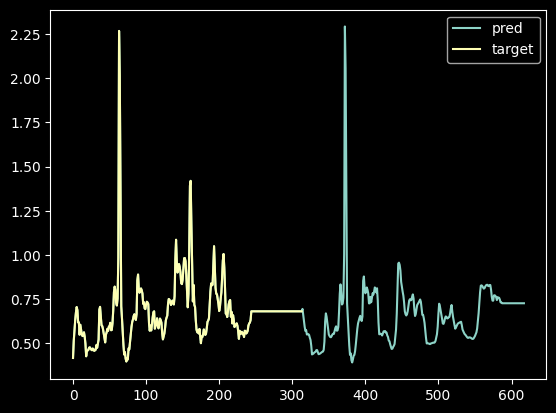

In [38]:
plt.plot(list(df['target'].values))
plt.plot(list(y.values))
plt.legend(['pred', 'target'])

In [498]:
%pip install -q torchmetrics

Note: you may need to restart the kernel to use updated packages.


In [504]:
from torchmetrics import R2Score, MeanAbsolutePercentageError

r2_score = R2Score()
mape = MeanAbsolutePercentageError()

y_pred = torch.tensor(list(df['target'].values))
y_true = torch.tensor(list(y))


R2 = r2_score(y_pred, y_true)

MAPE = mape(y_pred, y_true)
(R2 + (1 - MAPE))/2

tensor(0.4052)

In [506]:
df

,"KPI данные понедельно АлфаРМ_Продажи, упаковки","KPIданные помесячно АлфаРМ_Продажи, рубли","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 150 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 50 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 500 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 150 мл N1, упаковки","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 50 мл N1, упаковки","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 500 мл N1, упаковки",Дистрибуция (данные Альфа РМ)_Дистрибуция Мирамистин,выписки врачами_Выписки,...,"Медиа ТВ (Моделируемый бренд)_(4)ТВ, рубли","Медиа ТВ (Моделируемый бренд)_(4)ТВ, охват 5+(Ж 30-60 ВС)","Медиа ТВ (Моделируемый бренд)_(тотал)ТВ, trp(Ж 30-60 ВС)","Медиа ТВ (Моделируемый бренд)_(тотал)ТВ, рубли","Медиа ТВ (Моделируемый бренд)_(тотал)ТВ, охват 5+(Ж 30-60 ВС)","Медиа Диджитал (Моделируемый бренд)_Диджитал, рубли","Медиа Радио (Моделируемый бренд)_Радио, рубли","Медиа Радио (Моделируемый бренд)_Радио, количество выходов",Запросы Wordstat_Запросы Wordstat,target
0,0.393366,6.010572e-01,6.821159e-01,0.211245,3.284716e-01,0.707936,0.406401,9.744558e-01,0.181089,0.315286,...,-0.183926,-0.200609,1.548553,1.578103,1.631491,0.681832,-0.181481,-0.179688,5.661118e-01,0.731678
1,0.214631,6.010572e-01,6.821159e-01,0.211245,3.284716e-01,0.707936,0.406401,9.744558e-01,0.181089,0.315286,...,-0.183926,-0.200609,1.942994,1.578103,2.078413,0.578690,-0.181481,-0.179688,5.653974e-01,0.697000
2,0.238972,6.010572e-01,6.821159e-01,0.211245,3.284716e-01,0.707936,0.406401,9.744558e-01,0.181089,0.315286,...,-0.183926,-0.200609,1.943998,1.578103,1.996240,0.427477,-0.181481,-0.179688,6.534418e-01,0.692471
3,0.337609,6.010572e-01,6.821159e-01,0.211245,3.284716e-01,0.707936,0.406401,9.744558e-01,0.181089,0.315286,...,-0.183926,-0.200609,1.201692,1.443608,1.223139,1.092830,-0.181481,-0.179688,5.759342e-01,0.717480
4,0.454541,7.837268e-01,8.865063e-01,0.369124,2.418340e-01,0.917783,0.561758,8.833670e-01,0.181089,0.315286,...,-0.183926,-0.200609,1.341459,0.876320,1.408449,0.683309,-0.181481,-0.179688,6.043298e-01,0.734030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,-0.950187,-8.119723e-01,-1.217478e+00,0.208728,4.791407e-01,-1.571046,-0.691087,-5.451980e-01,1.022039,-1.405434,...,-0.183926,-0.200609,-0.564164,-0.562142,-0.572097,0.998020,-0.181481,-0.179688,-1.208529e+00,0.598815
144,-0.898663,-8.119723e-01,-1.217478e+00,0.208728,4.791407e-01,-1.571046,-0.691087,-5.451980e-01,1.022039,-1.405434,...,-0.183926,-0.200609,-0.564164,-0.562142,-0.572097,-0.253175,-0.181481,-0.179688,-1.058871e+00,0.611122
145,-0.885989,-8.119723e-01,-1.217478e+00,0.208728,4.791407e-01,-1.571046,-0.691087,-5.451980e-01,1.022039,-1.405434,...,-0.183926,-0.200609,-0.564164,-0.562142,-0.572097,-0.306919,-0.181481,-0.179688,-1.041964e+00,0.615949
146,-0.841608,-8.119723e-01,-1.217478e+00,0.208728,4.791407e-01,-1.571046,-0.691087,-5.451980e-01,1.022039,-1.405434,...,-0.183926,-0.200609,-0.564164,-0.562142,-0.572097,1.751039,11.710048,12.001078,-1.060895e+00,0.631067
